In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
import numpy as np
import time

data = pd.read_csv('solar_hourly_data_raw.csv', index_col=0)
data.index = pd.to_datetime(data.index, format ='%Y%m%d:%H-%M')

data = data.replace(0, np.NaN)

data1 = data.resample('d')['Bi', 'Di', 'Ri', 'As', 'Tamb', 'W10'].mean()
data1['EPV'] = data.resample('d')['EPV'].sum()

data1 = data1.dropna()


In [2]:
#splitting the data into X_train, X_test, y_train, y_test
X_train = data1.sample(frac=0.8,random_state=0)
X_test = data1.drop(X_train.index)

train_stats = X_train.describe()
train_stats.pop('EPV')
train_stats = train_stats.transpose()

y_train = X_train.pop('EPV')
y_test = X_test.pop('EPV')

#normalizing the data with mean at 0 and standard deviation = 1 for all features
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

normed_X_train = norm(X_train)
normed_X_test = norm(X_test)

In [3]:
# Building the model - of 2 layers, 
n_cols = X_train.shape[1]




In [10]:
t1 = time.time()
model = keras.Sequential()
model.add(Dense(64, activation='relu', input_shape = (n_cols, )))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_percentage_error', metrics=['mean_absolute_error', 'mean_squared_error'])

#training the model for 1000 epochs and for each epoch, printing a dot(directly taken from the tensor flow example)
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 

history = model.fit(
  normed_X_train.values, y_train.values, validation_split = 0.2, epochs=EPOCHS, verbose = 0, callbacks = [PrintDot()])

t2 = time.time()


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [11]:
print(str(t2-t1))


99.7083580493927


In [12]:
#printing the losses
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,val_mean_absolute_error,val_mean_squared_error,loss,mean_absolute_error,mean_squared_error,epoch
995,1.876062,874.707406,1.456216e+06,1.847445,927.288602,1.642285e+06,995
996,1.829014,869.182209,1.443655e+06,1.862733,928.653830,1.646788e+06,996
997,1.853157,879.990637,1.482443e+06,1.853967,927.676317,1.636123e+06,997
998,1.832596,869.288394,1.445592e+06,1.852789,927.663578,1.639875e+06,998
999,1.850295,869.109424,1.437532e+06,1.855898,926.596764,1.640328e+06,999


In [13]:
#prediction using X_test to get values corresponding to y_test
predictions = model.predict(normed_X_test)

(0, 71838.82628499887)

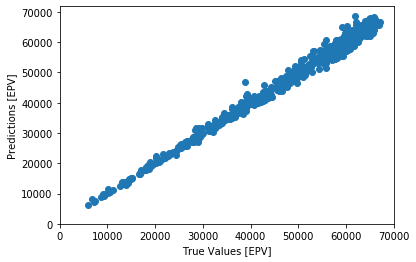

In [14]:
#plotting actual values vs the predicted values. The curve being a straight line show good accuracy i guess
plt.scatter(y_test, predictions)
plt.xlabel('True Values [EPV]')
plt.ylabel('Predictions [EPV]')

plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])



In [15]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,1500])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0, 40.0e+05])
  plt.legend()
  plt.show()

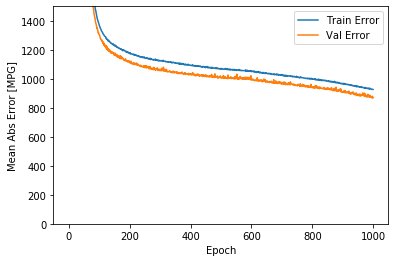

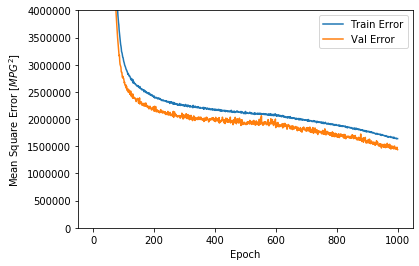

In [16]:
plot_history(history)